# <center> <h1>Assignment 6</h1> </center>
<center> <h1>EIN 4933/6935 Python for Data Science Summer 2020</h1> </center>

You will build a decision tree model using a data set related to breast cancer (Breast Cancer Wisconsin (Diagnostic) Data Set). You can have more info about the data set in this <a href="http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29">web-site</a>. 

You can use this link: https://sites.google.com/site/yasinunlu/home/research/new1/breast_cancer.csv to dowload the data in csv format. In this dataset there are 30 features and one response variable. It is highly likely to predict breast cancer by using a decision tree model and given the set of predictors for a number of observations.

The column named "diagnosis" shows whether a patient is diagnosed as "malignant" (M) or "benign" (B). Use this dataset to answer the questions below. You can create as many cells as you desire for all solutions.<br/>

## Questions:
1) Read the data into a dataframe from csv file source. Download link is given above. <br/>
2) Remove any irrelevant data columns from the dataframe. If there are any missing values in the dataset, they should be replaced through a data imputation method. Any missing rows should be deleted from the dataset. Each column data type must be converted into an appropriate data type. The data types can be obtained either in data info files or can be determined by inspection.<br/>
3) Convert categorical variables in "diagnosis" column into integer numerical values.<br/>
4) Transform the data so that it fits within a specific scale (0 and 1).<br/>
5) Create two dataframes: response and features. Split these dataframes into train and test parts.<br/>
6) Train a decision tree model using train part of the data.<br/>
7) Generate predictions over the test data.<br/>
8) Calculate the accuracy. <br/>
a) Write code that calculates the accuracy over test data.<br/>
b) Call the built-in function from scikit learn package to calculate the accuracy over test data.<br/>
9) Report and interpret the confusion matrix.<br/>
10) Report feature importance results. Create a dataframe that has two columns: one for the name of the feature and one for the associated score.<br/>

In [30]:
#1
import pandas as pd
df = pd.read_csv('breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
#2 and #3
df.drop(axis=1, columns='id', inplace=True)
from sklearn.preprocessing import LabelEncoder
df_clean = df.copy() 
labelencoder = LabelEncoder()
df_clean['diagnosis'] = labelencoder.fit_transform(df['diagnosis'])
df_clean.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [32]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int32  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [33]:
#4
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
df_scaled = scaler.fit_transform(df_clean)
df_clean = pd.DataFrame(df_scaled, columns = df_clean.columns.tolist())
df_clean.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [36]:
#5
features = df_clean.loc[:,'radius_mean':'fractal_dimension_worst']
response = df_clean[['diagnosis']]

In [37]:
from sklearn.model_selection import train_test_split
my_result_list = train_test_split(features, response, test_size=0.30, random_state=0)
features_train, features_test, response_train, response_test = my_result_list

In [38]:
#6
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(features_train, response_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [41]:
#7
response_pred = classifier.predict(features_test)
print('Predictions ',response_pred)
print('Actuals ',list(response_test['diagnosis']))

Predictions  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 0. 0. 0.]
Actuals  [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 

In [42]:
#8(b)
from sklearn.metrics import accuracy_score
print('Accuracy Score on test data: ', accuracy_score(y_true=response_test, y_pred=response_pred))

Accuracy Score on test data:  0.9122807017543859


In [48]:
#8(a)
predicted_value = pd.DataFrame(response_pred)
actual_value = pd.DataFrame(response_test)
x = actual_value.where(actual_value.values == predicted_value.values).notna()

counting_true = x.diagnosis[x.diagnosis == True].count()

accuracy = counting_true/len(predicted_value)
accuracy

0.9122807017543859

In [49]:
#9
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(response_test, response_pred)
print(cm)

[[97 11]
 [ 4 59]]


In [50]:
#10
importance = classifier.feature_importances_
feature_names = features.columns.to_list()

for i, score in enumerate(importance):
    print('%s: %.5f' % (feature_names[i], score))

radius_mean: 0.00000
texture_mean: 0.00000
perimeter_mean: 0.00000
area_mean: 0.00000
smoothness_mean: 0.00000
compactness_mean: 0.00000
concavity_mean: 0.02112
concave points_mean: 0.00000
symmetry_mean: 0.01815
fractal_dimension_mean: 0.00000
radius_se: 0.00000
texture_se: 0.00000
perimeter_se: 0.00000
area_se: 0.04749
smoothness_se: 0.01059
compactness_se: 0.00000
concavity_se: 0.00000
concave points_se: 0.00000
symmetry_se: 0.00000
fractal_dimension_se: 0.01016
radius_worst: 0.00000
texture_worst: 0.02784
perimeter_worst: 0.00000
area_worst: 0.08615
smoothness_worst: 0.00990
compactness_worst: 0.00000
concavity_worst: 0.01032
concave points_worst: 0.72811
symmetry_worst: 0.03015
fractal_dimension_worst: 0.00000


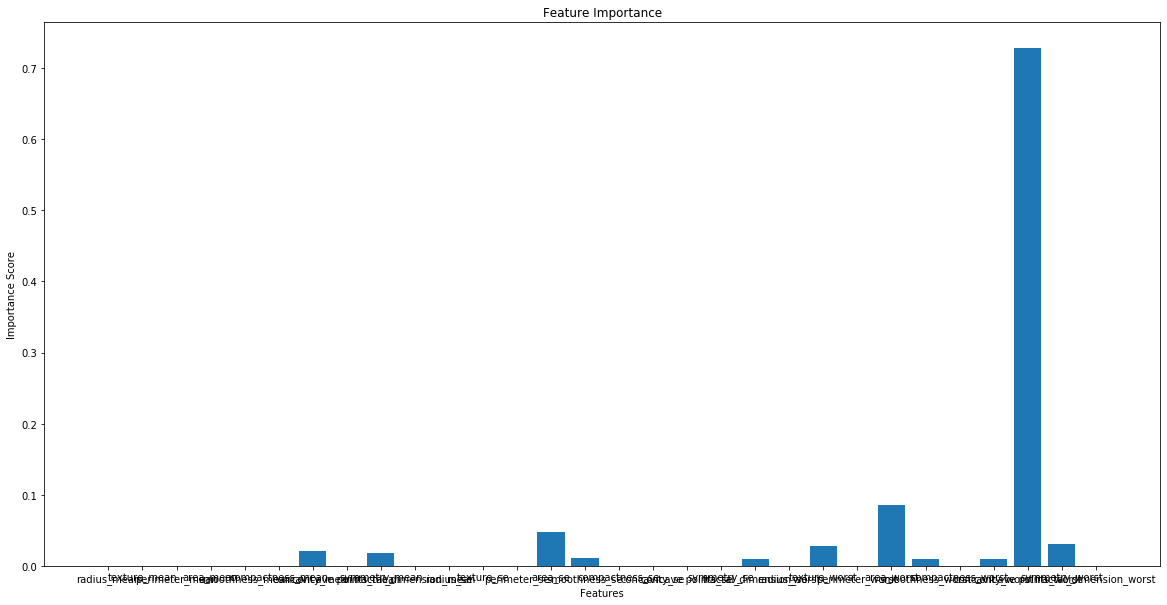

In [52]:
from matplotlib import pyplot
pyplot.figure(figsize=(20, 10))
# plot feature importance
pyplot.bar(x = list(range(len(importance))), height = importance, tick_label = feature_names)
pyplot.title('Feature Importance')
pyplot.xlabel('Features')
pyplot.ylabel('Importance Score')
pyplot.show()